#### *Customer Churn Prediction personnal project, by Redouane Hadni*

---

# Introduction

Predicting churn is an increasingly important subject, especially as more companies adopt subscription-based business models, such as Netflix, Spotify, and various software companies. This trend is also evident in sectors like banking and insurance, where customer retention can significantly impact profitability. Understanding and mitigating churn in these industries can lead to enhanced customer loyalty and improved financial performance.

The data set used in this project can be found here : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

The goal of this project is to develop a machine learning solution to predict whether a customer will unsubscribe (churn). Retaining existing customers is often more cost-effective than acquiring new ones. Identifying clients who are more likely to churn is crucial, as it allows the company to focus on those customers and implement targeted strategies to retain them.

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. 


#### Variable Descriptions


**Churn**: Indicates whether the customer has churned (Yes or No).

**tenure**: Represents the number of months the customer has been with the company.

**MonthlyCharges**: The amount billed to the customer on a monthly basis.

**TotalCharges**: The total amount billed to the customer over their tenure.

**Contract**: Represents the type of contract the customer is on (Month-to-month, One year, or Two year).

**gender**: Indicates the gender of the customer (male or female).

**SeniorCitizen**: Denotes whether the customer is a senior citizen (1 for yes, 0 for no).

**Partner**: Indicates if the customer has a partner (Yes or No).

**Dependents**: Specifies whether the customer has dependents (Yes or No).

**PaymentMethod**: Describes the customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), or Credit card (automatic)).

**PhoneService**: Indicates whether the customer subscribes to a phone service (Yes or No).

**InternetService**: Specifies the customer's internet service provider (DSL, Fiber optic, or No).

**MultipleLines**: Shows if the customer has multiple phone lines (Yes, No, or No phone service).

**OnlineSecurity**: Indicates whether the customer has online security features (Yes, No, or No internet service).

**OnlineBackup**: Denotes if the customer has online backup services (Yes, No, or No internet service).

**DeviceProtection**: Indicates whether the customer has device protection (Yes, No, or No internet service).

**TechSupport**: Specifies if the customer has tech support services (Yes, No, or No internet service).

**StreamingTV**: Indicates whether the customer has access to streaming TV services (Yes, No, or No internet service).

**StreamingMovies**: Shows if the customer has access to streaming movies (Yes, No, or No internet service).

**PaperlessBilling**: Indicates whether the customer uses paperless billing (Yes or No).

**customerID**: Unique identifier for each customer.

The first consideration is which metric we should optimize for. The two important metrics here are precision and recall:

- **Precision** refers to the ratio of clients predicted to be churners who will actually unsubscribe. Maximizing this metric ensures that the company does not waste money on clients who would not have left.

- **Recall**, on the other hand, is the ratio of clients who will leave the company that are correctly detected. Maximizing recall leads to retaining more clients.

Unfortunately, these two metrics cannot both be maximized simultaneously. The more restrictive we are in our predictions, the more precise our predictions become, but this also means we may detect fewer actual churners.

The balance between precision and recall depends on the type of company and the characteristics of its clients, particularly the cost of retaining a client and the lifetime value (LTV) of each client. For instance, a company with clients who have a high LTV and a low cost of retention may prioritize high recall, even at the expense of precision. This scenario suggests the need for a new metric, inspired by the F1 score, which accounts for the costs of retaining clients and their LTV, in our context we don't have these metrics, we will instead focus on a specific type of companies.

In this project, we will focus on small companies that are beginning to consider strategies to reduce churn. These companies aim to increase profitability while decreasing churn rates. In this context, we want to maximize precision while ensuring that recall does not drop too low.

For example, with a precision of 95% and a recall of 20%, only 5% of the money invested will be wasted, and the churn can be reduced by approximately 20%, depending on the effectiveness of the marketing campaign.

***
# Data Import
&nbsp;

In [119]:
# importing main modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [120]:
# Loading data
data = pd.read_csv("telco_customer_churn_dataset.csv")
# no need of customerID
data.drop('customerID', axis = 1, inplace = True)

In [121]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [122]:

def get_num_features(data):
    return data.nunique()[data.nunique() > 10].index.tolist()

def get_cat_features(data):
    return data.nunique()[data.nunique() < 10].index.tolist()

# Lists of numerical an categorical variables
num_features = get_num_features(data)
cat_features = get_cat_features(data)

# Target variable
target = 'Churn'

# turn the SeniorCitizen variable from 1/0 to yes/no
data['SeniorCitizen'] = data['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Display the features
print("Numerical Features:")
print(num_features)

print("\nCategorical Features:")
print(cat_features)

Numerical Features:
['tenure', 'MonthlyCharges', 'TotalCharges']

Categorical Features:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**There a no missing values**

In [125]:
data[num_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 165.2+ KB


**The TotalCharges variable is considered to be of type object, wich isn't normal. Let's investigate it.**

In [127]:
for index, value in enumerate(data['TotalCharges'].unique()): 
    try :
        f = float(value)
    except:
        print(f'at line : {index} we have the value : \"{value}\", that is not a float')

at line : 484 we have the value : " ", that is not a float


In [128]:
# we drop the line corresponding to this mistaken value
data = data[data['TotalCharges'] != " "]
# Then we can convert the TotalCharges variable into a float variable
data.loc[:, 'TotalCharges'] = data['TotalCharges'].astype(float)

In [129]:
data[num_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7032 non-null   int64  
 1   MonthlyCharges  7032 non-null   float64
 2   TotalCharges    7032 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 219.8+ KB


**the problem is solved, there was a space, which made conversion impossible**

In [131]:
data[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   SeniorCitizen     7032 non-null   object
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   PhoneService      7032 non-null   object
 5   MultipleLines     7032 non-null   object
 6   InternetService   7032 non-null   object
 7   OnlineSecurity    7032 non-null   object
 8   OnlineBackup      7032 non-null   object
 9   DeviceProtection  7032 non-null   object
 10  TechSupport       7032 non-null   object
 11  StreamingTV       7032 non-null   object
 12  StreamingMovies   7032 non-null   object
 13  Contract          7032 non-null   object
 14  PaperlessBilling  7032 non-null   object
 15  PaymentMethod     7032 non-null   object
 16  Churn             7032 non-null   object
dtypes: object(17)
memor

### Note

**This database is very clean, and has very few problems, the main work will be in developing an effective model to predict churn.**

***
# Data Exploration
&nbsp;

In [135]:
# Function that return the distribution of a categorical variable
def plot_cat_variable_distribution(data, variable):
    dist = data[variable].value_counts(normalize=True).reset_index()
    dist.columns = [variable, 'proportion']  # Renommer les colonnes
    dist['proportion'] = dist['proportion'] * 100
    sns.barplot(x=variable, y='proportion', data=dist)
    plt.title(f'Distribution of {variable} (%)')
    plt.ylabel('')
    plt.grid(alpha=0.3)
    plt.show()

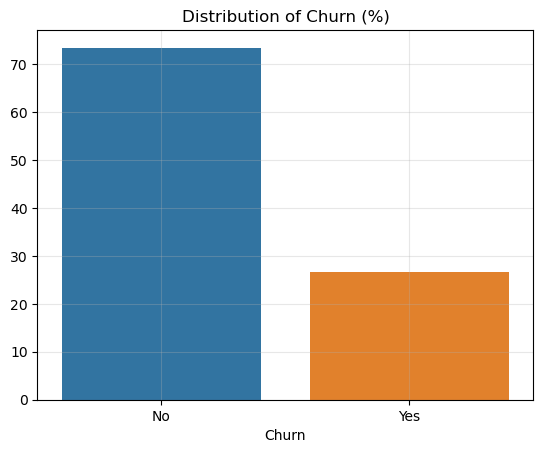

In [136]:
plot_cat_variable_distribution(data, 'Churn')

**The churn variable is imbalanced, which is something to take into account during model training and testing. The accuracy metric can be misleading because a model that always predicts churn = yes would have 73% accuracy. In our case, the label variable is not severely imbalanced, so rebalancing might not be crucial. However, we can create a hyperparameter to indicate whether we have rebalanced the dataset and evaluate if it improves the performance metrics.
It's important to make sure that the models we're going to test learn the minority class.**

In [138]:
# Function that return the distribution of a numerical variable
def plot_num_variable_distribution(data, variable):
    plt.figure(figsize=(4, 3))
    sns.histplot(data[variable], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(alpha=0.3)
    plt.show()

C:\Users\redou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


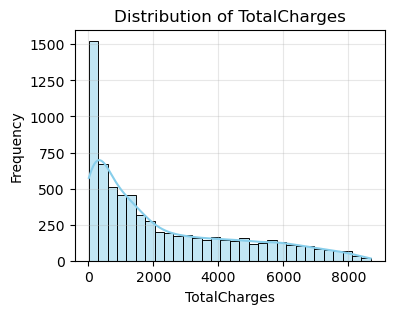

In [139]:
plot_num_variable_distribution(data, 'TotalCharges')

C:\Users\redou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


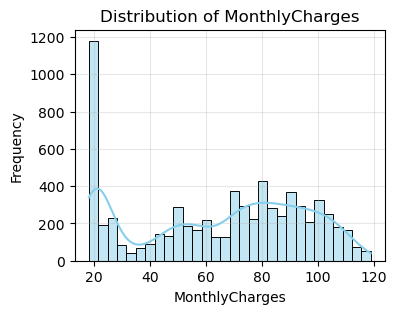

In [140]:
plot_num_variable_distribution(data, 'MonthlyCharges')

C:\Users\redou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


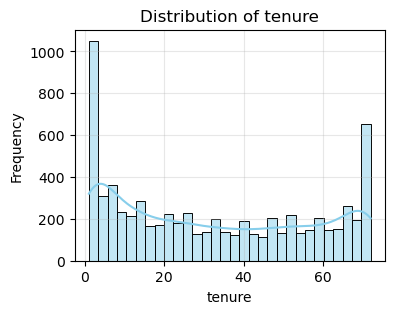

In [141]:
plot_num_variable_distribution(data, 'tenure')

**We could transform those numerical features to make the distribution closer to a Gaussian distribution, depending on the model, as some algorithms benefit from normally distributed data while others are less sensitive to feature distribution.**

In [143]:
def plot_num_variable_by_churn(variable_name, data):
    table = data.groupby('Churn')[variable_name].mean().reset_index()
    table.columns = ['Churn', variable_name]

    sns.barplot(x = 'Churn', y = variable_name, data = table)
    plt.ylabel('')
    plt.title('Average ' +variable_name)
    plt.xlabel('Churn')
    plt.grid(alpha=0.3)
    plt.show()

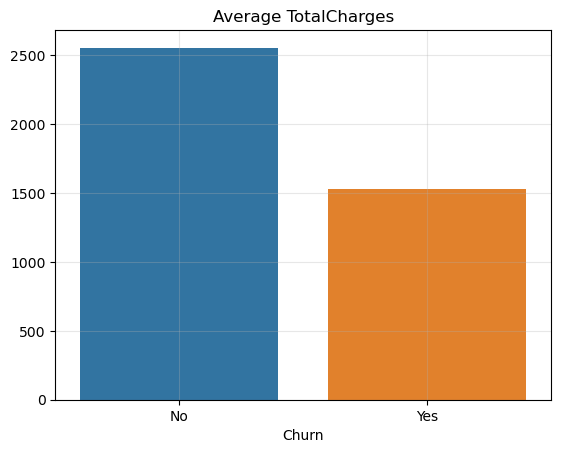

In [144]:
plot_num_variable_by_churn('TotalCharges', data)

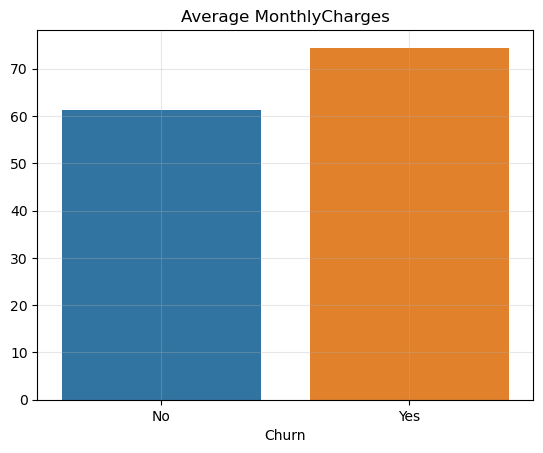

In [145]:
plot_num_variable_by_churn('MonthlyCharges', data)

**Clients that don’t churn stay longer with the company, so they spend more, as shown in the first plot. However, if we take a closer look at the average monthly charge, we can see that clients who churn have a higher average monthly charge, which could be the reason they unsubscribe.**

***
# Feature Engineering

&nbsp;

In [148]:
from sklearn.preprocessing import OrdinalEncoder

# Function that display the distribution of variables and the correlation with the variable Churn
def plot_churn_correlations(data):

    # Encode categorical features
    ordinal_encoder = OrdinalEncoder()
    encoded_data = data.copy()
    encoded_data[cat_features] = ordinal_encoder.fit_transform(encoded_data[cat_features])
    
    # Create correlation distribution for plotting
    dist = encoded_data.corr()['Churn'].abs().sort_values(ascending=False).reset_index()
    dist.columns = ['variable', 'correlation']
    dist = dist[dist['variable'] != 'Churn']

    sns.barplot(x = 'correlation', y = 'variable', data = dist, orient = 'h')
    plt.ylabel('')
    plt.title('Correlation of each variable with the churn variable, in absolute value', fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()



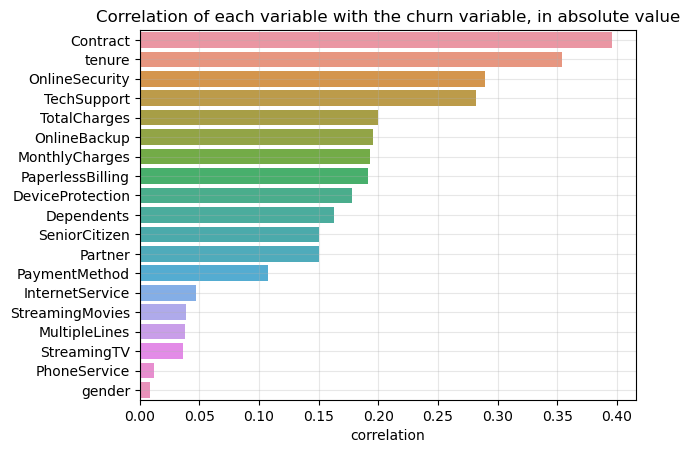

In [149]:
plot_churn_correlations(data)

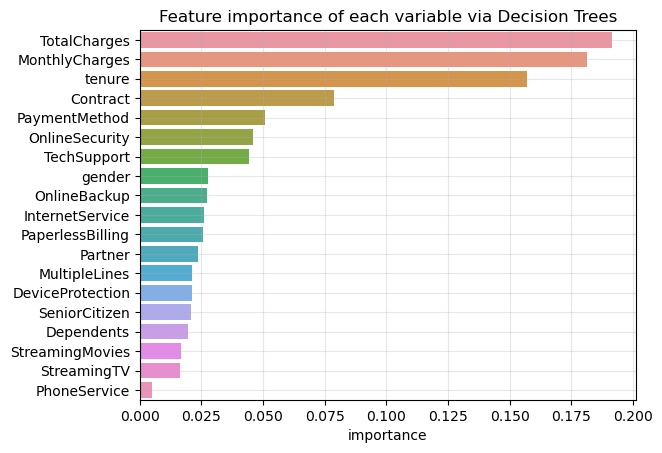

In [151]:
from sklearn.ensemble import RandomForestClassifier

# Function to display the feature importance of variables via decision tree
def plot_feature_importance_decision_tree(data, figsize=(6.4, 4.8)):

    cat_features = get_cat_features(data)
    num_features = get_cat_features(data)
    
    # Encode categorical features
    ordinal_encoder = OrdinalEncoder()
    encoded_data = data.copy()
    encoded_data[cat_features] = ordinal_encoder.fit_transform(encoded_data[cat_features])

    # Separate features and target
    X = encoded_data.drop('Churn', axis=1)
    y = encoded_data['Churn']

    # Train a decision tree classifier
    tree_clf = RandomForestClassifier(random_state=42)
    tree_clf.fit(X, y)

    # Get feature importances
    feature_importances = tree_clf.feature_importances_
    feature_names = X.columns

    # Create a DataFrame for plotting
    dist = pd.DataFrame({
        'variable': feature_names,
        'importance': feature_importances
    }).sort_values(by='importance', ascending=False).reset_index(drop=True)

    # Plot the feature importance
    plt.figure(figsize=figsize)
    sns.barplot(x='importance', y='variable', data=dist, orient='h')
    plt.ylabel('')
    plt.title('Feature importance of each variable via Decision Trees', fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# Example usage
plot_feature_importance_decision_tree(data)

### Categorical variable encoding

OneHot encoding is useful here because it allows us to observe the individual effect of each category within every categorical feature. Additionally, it does not assume any order in the categories, unlike label encoding. However, it significantly increases the dataset's dimensionality. To keep the algorithm running efficiently and speed up hyperparameter tuning, we’ll select only a fraction of these new variables. While this approach is not optimal, we could improve performance by identifying the best subset of features to include.

In [221]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='if_binary')
copied_data = data.copy().reset_index(drop=True)

cat_features_without_churn = [col for col in get_cat_features(copied_data) if col != 'Churn']

encoded_cat_features_df = encoder.fit_transform(copied_data[cat_features_without_churn])
encoded_cat_features_df = pd.DataFrame(encoded_cat_features_df, columns = encoder.get_feature_names_out(cat_features_without_churn))

num_features_df = data[num_features].copy()
num_features_df.reset_index(drop=True, inplace=True)

target = data['Churn'].reset_index(drop=True)

encoded_data = pd.concat([num_features_df, encoded_cat_features_df, target], axis = 1)

#encoded_data 

C:\Users\redou\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


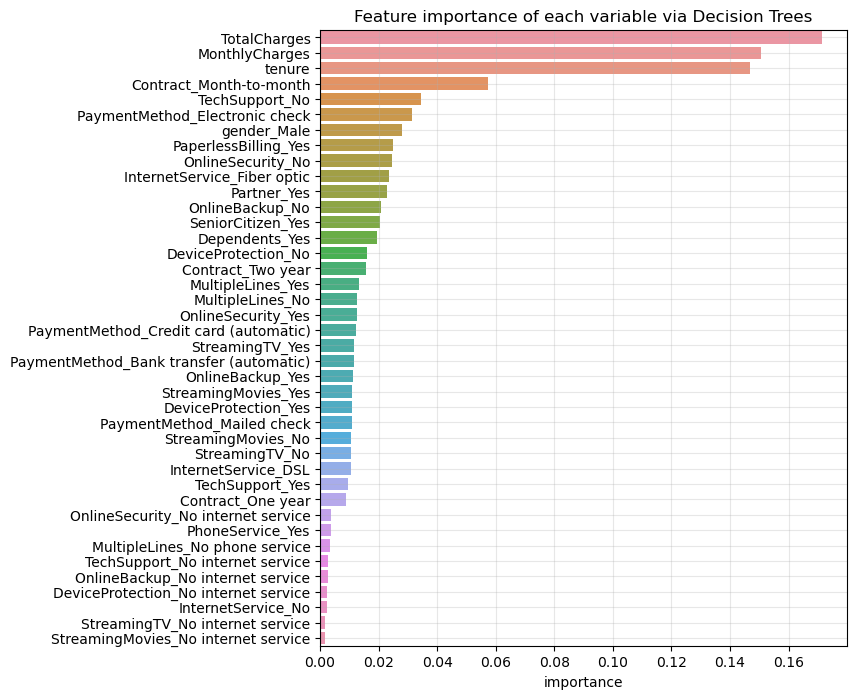

In [154]:
plot_feature_importance_decision_tree(encoded_data, figsize=(6.8, 8))

In [226]:
# Function to get features with importance above a threshold
def get_important_features(data, threshold=0.0):

    cat_features = get_cat_features(data)
    # Encode categorical features
    ordinal_encoder = OrdinalEncoder()
    encoded_data = data.copy()
    encoded_data[cat_features] = ordinal_encoder.fit_transform(encoded_data[cat_features])

    X = encoded_data.drop('Churn', axis=1)
    y = encoded_data['Churn']

    # Train a decision tree classifier
    tree_clf = RandomForestClassifier(random_state=42)
    tree_clf.fit(X, y)

    # Get feature importances
    feature_importances = tree_clf.feature_importances_
    feature_names = X.columns

    # Create a DataFrame for features and their importances
    dist = pd.DataFrame({
        'variable': feature_names,
        'importance': feature_importances
    }).sort_values(by='importance', ascending=False).reset_index(drop=True)

    # Filter features based on the threshold
    important_features = dist[dist['importance'] > threshold]

    # Return the filtered features
    return important_features


threshold_value = 0.05
important_features_df = get_important_features(encoded_data, threshold=0.012)

print('Features that have over 0.012 importance')
print(important_features_df)

Features that have over 0.012 importance
                                 variable  importance
0                            TotalCharges    0.171396
1                          MonthlyCharges    0.150712
2                                  tenure    0.146929
3                 Contract_Month-to-month    0.057261
4                          TechSupport_No    0.034596
5          PaymentMethod_Electronic check    0.031256
6                             gender_Male    0.027886
7                    PaperlessBilling_Yes    0.024917
8                       OnlineSecurity_No    0.024477
9             InternetService_Fiber optic    0.023528
10                            Partner_Yes    0.022826
11                        OnlineBackup_No    0.020836
12                      SeniorCitizen_Yes    0.020608
13                         Dependents_Yes    0.019281
14                    DeviceProtection_No    0.016101
15                      Contract_Two year    0.015662
16                      MultipleLines_Yes

In [269]:
import_features = important_features_df['variable'].unique().tolist()
final_df = encoded_data[import_features]
final_df.head()

,TotalCharges,MonthlyCharges,tenure,Contract_Month-to-month,TechSupport_No,PaymentMethod_Electronic check,gender_Male,PaperlessBilling_Yes,OnlineSecurity_No,InternetService_Fiber optic,Partner_Yes,OnlineBackup_No,SeniorCitizen_Yes,Dependents_Yes,DeviceProtection_No,Contract_Two year,MultipleLines_Yes,MultipleLines_No,OnlineSecurity_Yes,PaymentMethod_Credit card (automatic)
0,29.85,29.85,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1889.5,56.95,34,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,108.15,53.85,2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1840.75,42.30,45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,151.65,70.70,2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### Gaussian distribution

C:\Users\redou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


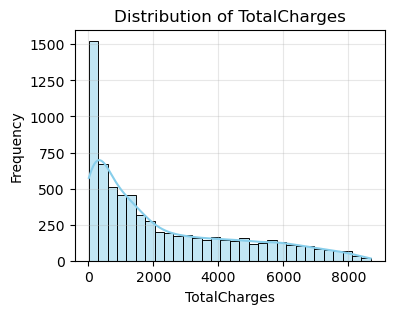

In [159]:
plot_num_variable_distribution(final_df, 'TotalCharges')

C:\Users\redou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


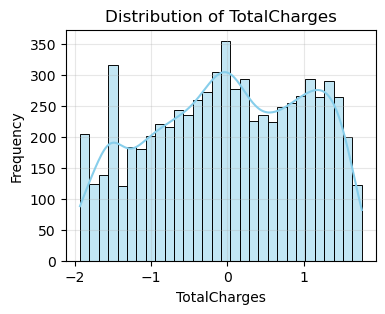

In [160]:
df = final_df.copy()
#df['TotalCharges'] = df['TotalCharges'].apply(float).apply(np.sqrt)
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

df['TotalCharges'] = pt.fit_transform(df['TotalCharges'].to_frame())

plot_num_variable_distribution(df, 'TotalCharges')

**Transforming the data distribution into a gaussian distribution, can help linear regression & logistic regression perform better, because these models assume normally distributed errors.** 

***
# Data pre-treatment

&nbsp;
We will now create the preprocessing pipeline, which includes three main steps:  


- Encoding categorical features
- Selecting the most important features
- Scaling the numerical features

&nbsp;

In [163]:
# Creation of the pre-treatment pipeline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Transformer that perform the OneHot Encoding
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(sparse=False, drop='if_binary')
        self.label_encoder = LabelEncoder()
        self.cat_features = None
        self.num_features = None
    
    def fit(self, X, y=None):

        self.cat_features = get_cat_features(X)
        self.num_features = get_num_features(X)
 
        self.encoder.fit(X[self.cat_features])
        
        return self

    def transform(self, X):
        X = X.copy().reset_index(drop=True)

        # OneHot Encoding
        cat_features_df = self.encoder.transform(X[self.cat_features])
        cat_features_df = pd.DataFrame(cat_features_df, columns=self.encoder.get_feature_names_out(self.cat_features))

        num_features_df = X[self.num_features].reset_index(drop=True)

        # Reconstruction of the dataframe
        encoded_df = pd.concat([num_features_df, cat_features_df], axis=1)

        return encoded_df

# Transformer that perform the selection of the k top features
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, k):
        self.top_features = []
        self.k = k
        
    def fit(self, X, y=None):

        # Train a decision tree classifier
        tree_clf = RandomForestClassifier(random_state=42)
        tree_clf.fit(X, y)
    
        # Get feature importances
        feature_importances = tree_clf.feature_importances_
        feature_names = X.columns

        feature_importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': feature_importances
        })

        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        self.top_features = feature_importance_df['Feature'][:self.k].values

        return self
        
    def transform(self, X):
        return X[self.top_features]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling transformer, that perform standardization if standard = True otherwise it perform normalization
class ScalingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, standard=True):
        self.standard_scaler = None
        self.min_max_scaler = None
        self.standard = standard
        self.num_features = []
    def fit(self, X, y=None):
        
        X = X.copy()
        self.num_features = get_num_features(X)

        if self.standard:
            self.standard_scaler = StandardScaler()
            self.standard_scaler.fit(X[num_features])
        else:
            self.min_max_scaler = MinMaxScaler()
            self.min_max_scaler.fit(X[num_features])

        return self
    def transform(self, X):

        X = X.copy()
        if self.standard:
            X[num_features] = self.standard_scaler.transform(X[num_features])

        else:
            X[num_features] = self.min_max_scaler.transform(X[num_features])
        
        return X


In [164]:
from sklearn.pipeline import Pipeline

pre_treatment_pipeline = Pipeline([
    ('encoder', FeatureEncoder()),
    ('feature_selector', TopFeatureSelector(k=12)),
    ('scaler', ScalingTransformer()),
])

X = data.drop('Churn', axis=1)
y = data['Churn']

treated_data = pre_treatment_pipeline.fit_transform(X, y)
treated_data.head()

C:\Users\redou\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,TotalCharges,MonthlyCharges,tenure,Contract_Month-to-month,TechSupport_No,PaymentMethod_Electronic check,gender_Male,PaperlessBilling_Yes,OnlineSecurity_No,InternetService_Fiber optic,Partner_Yes,OnlineBackup_No
0,-0.994194,-1.161694,-1.280248,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,-0.173740,-0.260878,0.064303,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.959649,-0.363923,-1.239504,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,-0.195248,-0.747850,0.512486,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.940457,0.196178,-1.239504,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


***
# Model Training
&nbsp;

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC

label_encoder = LabelEncoder()

X = data.drop('Churn', axis = 1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

X_train = pre_treatment_pipeline.fit_transform(X_train, y_train)
X_test = pre_treatment_pipeline.transform(X_test)

cat_features = get_cat_features(X_train)

# SMOTE oversampling algorithm
smote_nc = SMOTENC(categorical_features=cat_features, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)


C:\Users\redou\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


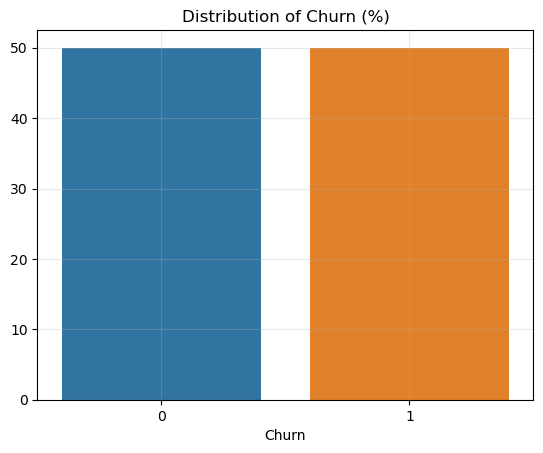

In [273]:
plot_cat_variable_distribution(pd.DataFrame(y_train_resampled, columns=['Churn']), 'Churn')

**We can see that the SMOTE algorithm work well, the churn variable is now balanced.**

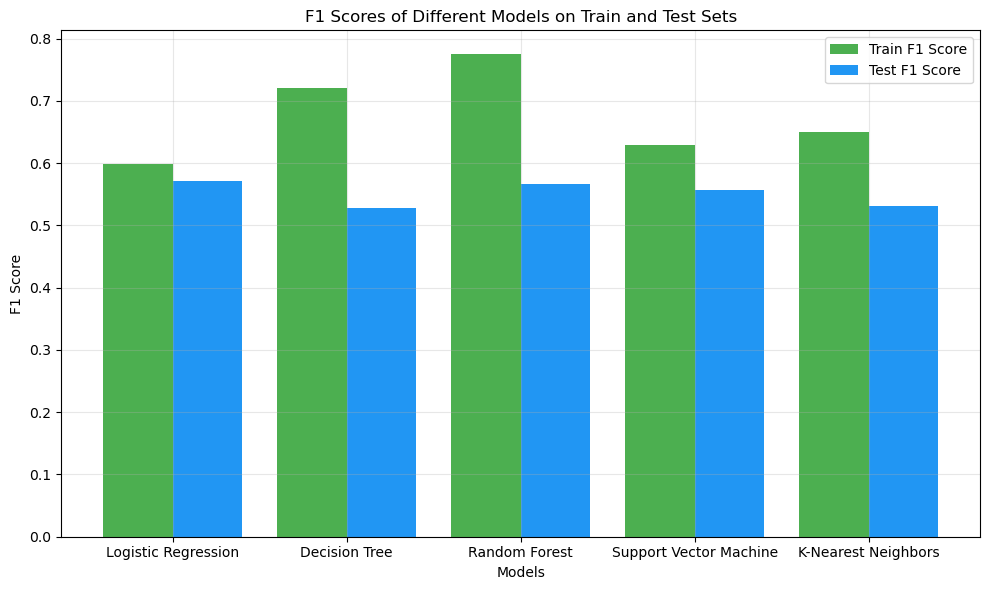

In [277]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform, randint

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Hyperparameter grids for RandomizedSearchCV
param_distributions = {
    'Logistic Regression': {'C': uniform(0.01, 10)},
    'Decision Tree': {'max_depth': [None, 5, 10, 15], 'min_samples_split': randint(2, 11)},
    'Random Forest': {'n_estimators': randint(50, 200), 'max_depth': [None, 10, 20]},
    'Support Vector Machine': {'C': uniform(0.01, 10), 'kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors': {'n_neighbors': randint(3, 10)}
}

# Storage for results
results = {'Model': [], 'Train F1 Score': [], 'Test F1 Score': []}

# Loop for each model
for model_name, model in models.items():
    random_search = RandomizedSearchCV(
        model, 
        param_distributions[model_name], 
        scoring='f1', 
        cv=5, 
        n_jobs=-1, 
        random_state=42,
        n_iter=10  # Adjust for faster or more thorough search
    )
    random_search.fit(X_train, y_train)
    
    # Best model found
    best_model = random_search.best_estimator_
    
    # Predictions and F1 score calculations
    train_pred = best_model.predict(X_train)
    test_pred = best_model.predict(X_test)
    
    train_f1 = f1_score(y_train, train_pred)
    test_f1 = f1_score(y_test, test_pred)
    
    results['Model'].append(model_name)
    results['Train F1 Score'].append(train_f1)
    results['Test F1 Score'].append(test_f1)

# Converting results to DataFrame
results_df = pd.DataFrame(results)

# Displaying results in bar chart
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df['Model']))
plt.bar(x - 0.2, results_df['Train F1 Score'], width=0.4, label='Train F1 Score', color='#4CAF50')  # Green
plt.bar(x + 0.2, results_df['Test F1 Score'], width=0.4, label='Test F1 Score', color='#2196F3')   # Blue

plt.xticks(x, results_df['Model'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Models on Train and Test Sets')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**The logistic regression and random forest algorithms are both interesting here. Logistic regression has the best test F1 score, while random forest has the second-best test F1 score and shows great potential due to its strong performance on the training set. It appears to be overfitting, so increasing regularization may improve its performance.**

Fitting model: Logistic Regression with Original data (train size: 5625)
Fitting model: Logistic Regression with Resampled data (train size: 8260)
Fitting model: Random Forest with Original data (train size: 5625)
Fitting model: Random Forest with Resampled data (train size: 8260)
Results Lengths: Model=4, Train F1 Score=4, Test F1 Score=4


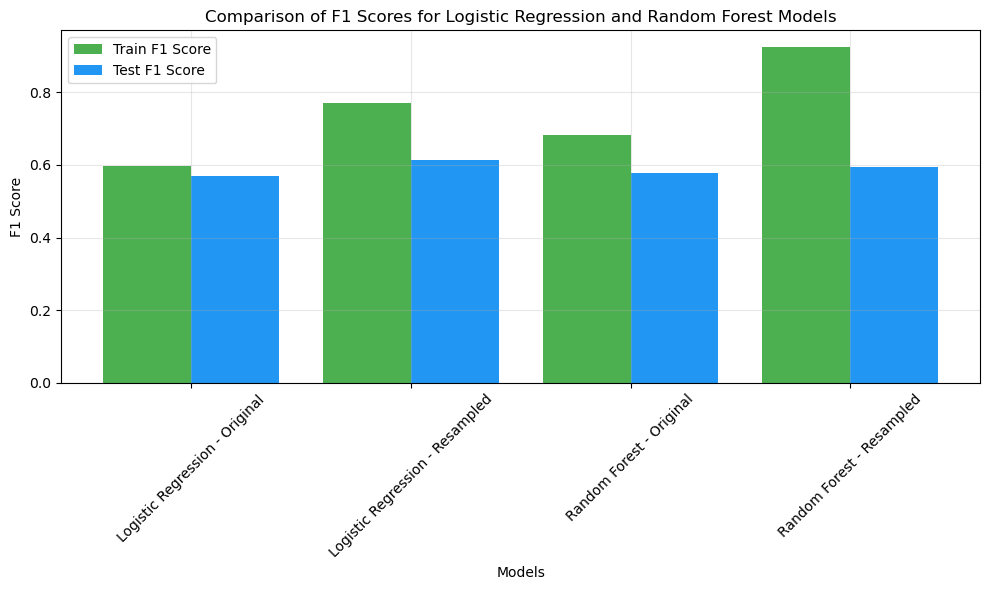

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE  # Import SMOTE
from scipy.stats import uniform, randint

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

# Hyperparameter grids for RandomizedSearchCV
param_distributions = {
    'Logistic Regression': {
        'C': uniform(0.01, 10),
        'penalty': ['l1', 'l2'],  # Types of regularization
        'solver': ['liblinear', 'saga'],  # Solvers compatible with l1
        'max_iter': [100, 200, 500]
    },
    'Random Forest': {
        'n_estimators': randint(50, 300),  # Number of trees
        'max_depth': [None, 10, 20, 30],  # Limit depth
        'min_samples_split': randint(2, 20),  # Avoid overfitting
        'min_samples_leaf': randint(1, 10)  # Avoid overfitting
    }
}

# Storage for results
results = {'Model': [], 'Train F1 Score': [], 'Test F1 Score': []}
trained_models = {}  # Dictionary to store trained models

# Loop for each model
for model_name, model in models.items():
    for X_train_data, y_train_data, label in zip(
        [X_train, X_train_resampled], 
        [y_train, y_train_resampled],
        ['Original', 'Resampled']
    ):
        random_search = RandomizedSearchCV(
            model, 
            param_distributions[model_name], 
            scoring='f1', 
            cv=5, 
            n_jobs=-1, 
            random_state=42,
            n_iter=10  # Adjust for faster or more thorough search
        )
        
        # Check data size before training
        print(f'Fitting model: {model_name} with {label} data (train size: {len(X_train_data)})')
        
        random_search.fit(X_train_data, y_train_data)
        
        # Best model found
        best_model = random_search.best_estimator_
        
        # Store the trained model
        trained_models[f'{model_name} - {label}'] = best_model
        
        # Predictions and F1 score calculations
        train_pred = best_model.predict(X_train_data)
        test_pred = best_model.predict(X_test)
        
        train_f1 = f1_score(y_train_data, train_pred)
        test_f1 = f1_score(y_test, test_pred)
        
        results['Model'].append(f'{model_name} - {label}')
        results['Train F1 Score'].append(train_f1)
        results['Test F1 Score'].append(test_f1)

# Check lengths of lists in results
print(f"Results Lengths: Model={len(results['Model'])}, Train F1 Score={len(results['Train F1 Score'])}, Test F1 Score={len(results['Test F1 Score'])}")

# Converting results to DataFrame
results_df = pd.DataFrame(results)

# Displaying results in bar chart
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df['Model']))
plt.bar(x - 0.2, results_df['Train F1 Score'], width=0.4, label='Train F1 Score', color='#4CAF50')  # Green
plt.bar(x + 0.2, results_df['Test F1 Score'], width=0.4, label='Test F1 Score', color='#2196F3')   # Blue

plt.xticks(x, results_df['Model'], rotation=45)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Logistic Regression and Random Forest Models')
plt.legend()
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

# Using trained models later
# For example, to access the logistic model on resampled data:
logistic_model_resampled = trained_models['Logistic Regression - Resampled']


**The performance of logistic regression has increased when using the resampled dataset, we will use this model for the final optimization.**

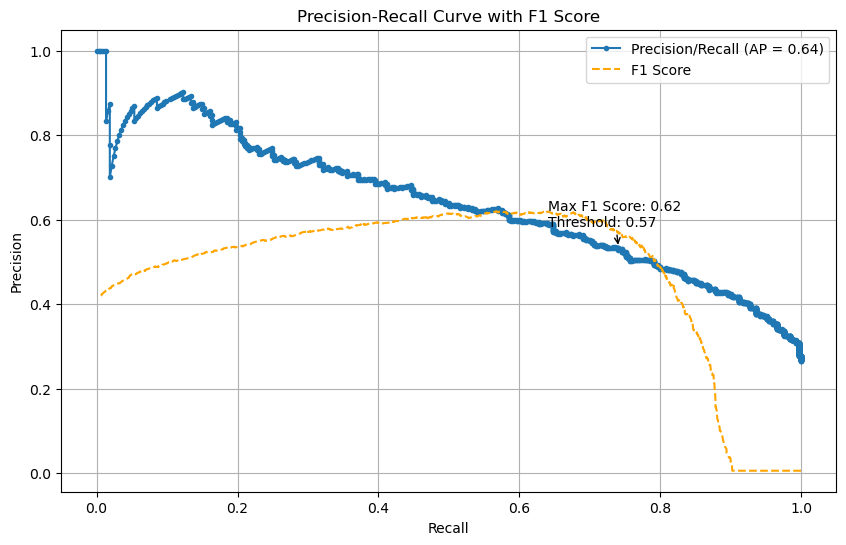

In [283]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score

# Ensure the logistic regression model on the resampled data is loaded
logistic_model_resampled = trained_models['Logistic Regression - Resampled']

# Get the predicted probabilities on the test set
y_scores = logistic_model_resampled.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the average precision
average_precision = average_precision_score(y_test, y_scores)

# Calculate the F1 score for each threshold
f1_scores = [f1_score(y_test, (y_scores >= threshold).astype(int)) for threshold in thresholds]

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Precision/Recall (AP = {:.2f})'.format(average_precision))

# Plot the F1 score
plt.plot(np.append(thresholds, 1), np.append(f1_scores, f1_scores[-1]), label='F1 Score', color='orange', linestyle='--')

# Add annotations for the maximum F1 score
max_f1_index = np.argmax(f1_scores)
max_f1_value = f1_scores[max_f1_index]
optimal_threshold = thresholds[max_f1_index]

plt.annotate(f'Max F1 Score: {max_f1_value:.2f}\nThreshold: {optimal_threshold:.2f}',
             xy=(recall[max_f1_index], precision[max_f1_index]),
             xytext=(recall[max_f1_index] - 0.1, precision[max_f1_index] + 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Graph elements
plt.title('Precision-Recall Curve with F1 Score')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.legend()
plt.show()


In [173]:
from sklearn.metrics import precision_score, recall_score

# Treshold selection
custom_threshold = 0.86
y_pred_custom = (y_scores >= custom_threshold).astype(int)

custom_précision = precision_score(y_test, y_pred_custom)
custom_recall = recall_score(y_test, y_pred_custom)

print(f'Custom threshold : {custom_threshold}')
print(f'Custom précision : {custom_précision}')
print(f'Custom recall : {custom_recall}')


Custom threshold : 0.86
Custom précision : 0.8395061728395061
Custom recall : 0.18181818181818182


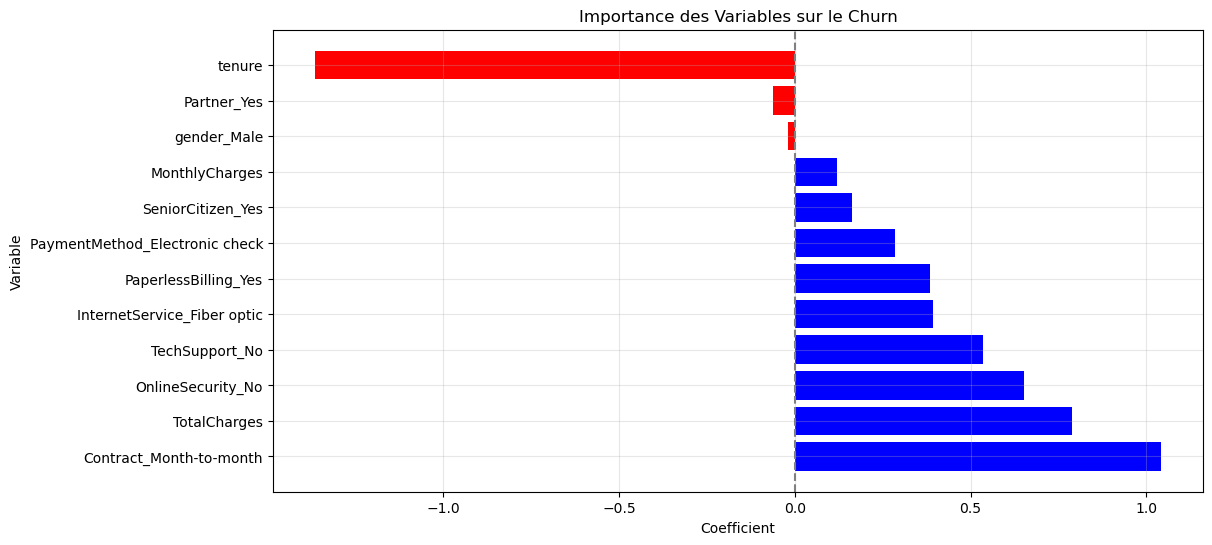

In [285]:

feature_names = X_train_resampled.columns
coefficients = logistic_model_resampled.coef_[0]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color=(importance_df['Coefficient'] > 0).map({True: 'blue', False: 'red'}))
plt.axvline(0, color='gray', linestyle='--')
plt.title('Importance des Variables sur le Churn')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.grid(alpha=0.3)
plt.show()


With this graph, we can see that tenure has a significant impact on whether a client stays with the company. The two main factors that directly influence churn are the type of contract and total charges. Clients with month-to-month contracts are more likely to churn, and those who pay too much are more likely to leave in search of a better deal. This indicates that it is unproductive to invest money in retaining clients who are at the beginning of their annual contract, instead, we should focus on targeting them closer to the end. Additionally, clients who pay a certain amount and do not have online tech support or additional services are also more likely to quit.

***
# Conclusion
&nbsp;

**For a company that is beginning to reduce churn, we should maximize precision while maintaining a recall that isn’t too small. This strategy allows the company to save money by ensuring that all investments made in retaining clients are effectively utilized. For other types of companies, the approach depends on the budget available for client retention and the lifetime value of each client. We could create a new metric inspired by the F1 score that can be optimized to increase profitability.**

**For the first type of company, we can achieve a precision of approximately 0.80 and a recall of 0.20. This means that we can prevent 20% of clients from leaving while minimizing wasted expenditure. In fact, 20% of the money invested to prevent churn will be wasted, which is not catastrophic.**

**Key Takeaways:**
- **Clients cannot churn while they currently have a contract, we should only target them at the end.**
- **The bill needs to accurately reflect the services provided, otherwise, clients may want to leave the company.**
- **Clients who have been with the company for a long time are more likely to stay, as they tend to be satisfied.**